In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates


In [2]:
data = pd.read_csv(r"C:\Users\olivi\Downloads\AAPL_2006-01-01_to_2018-01-01 (1).csv", parse_dates=['Date'])
data.set_index('Date', inplace=True)

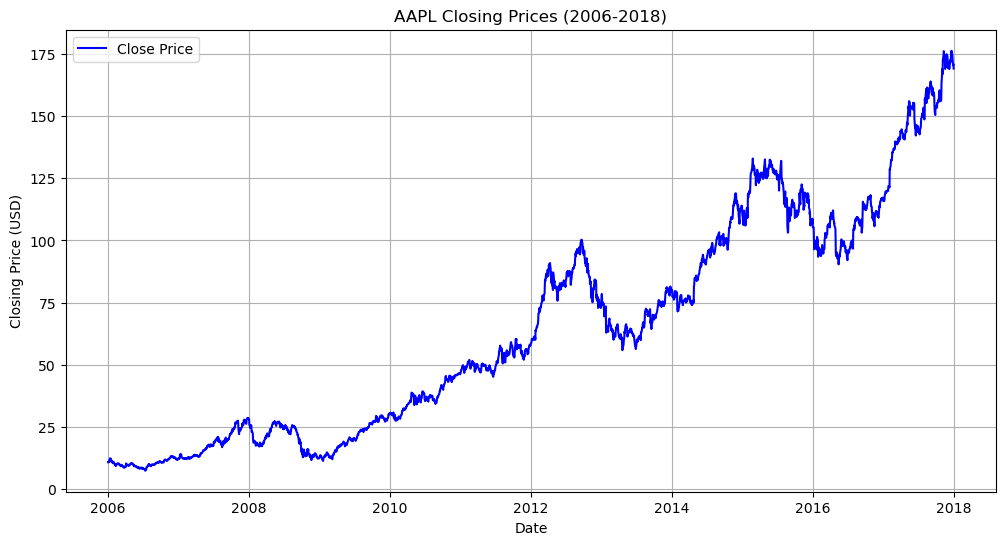

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.title('AAPL Closing Prices (2006-2018)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

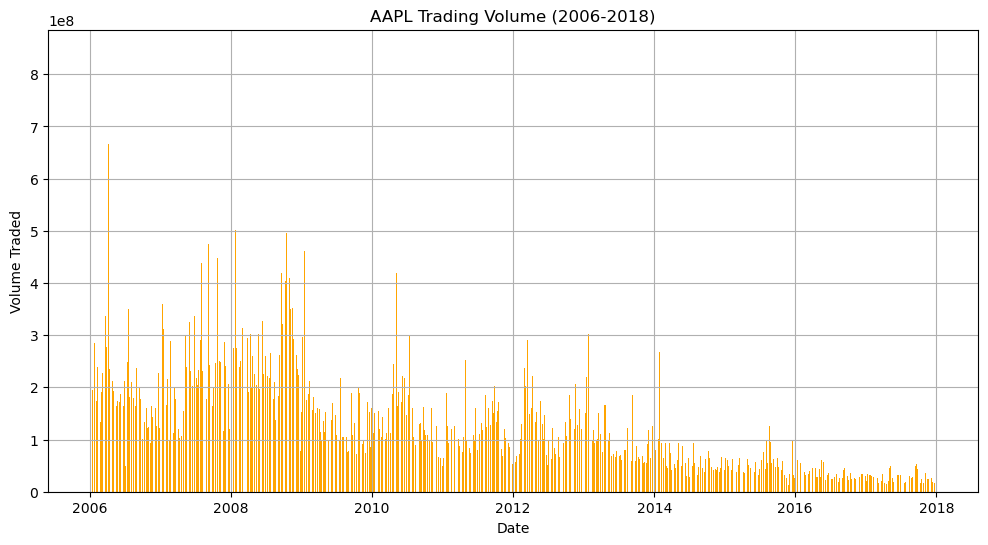

In [4]:
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'], color='orange')
plt.title('AAPL Trading Volume (2006-2018)')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.grid(True)
plt.show()

C:\Users\olivi\AppData\Local\Temp\ipykernel_21424\1605670055.py:6: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  data_candle['Date'] = mdates.date2num(data_candle['Date'].dt.to_pydatetime())


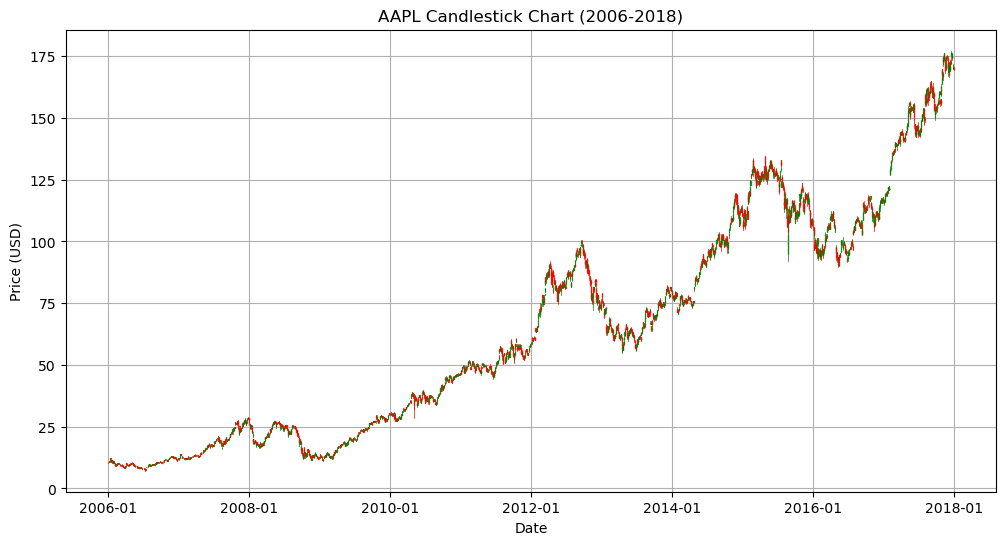

In [5]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Prepare data for candlestick chart
data_candle = data.reset_index()
data_candle['Date'] = mdates.date2num(data_candle['Date'].dt.to_pydatetime())
ohlc = data_candle[['Date', 'Open', 'High', 'Low', 'Close']]

fig, ax = plt.subplots(figsize=(12, 6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('AAPL Candlestick Chart (2006-2018)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

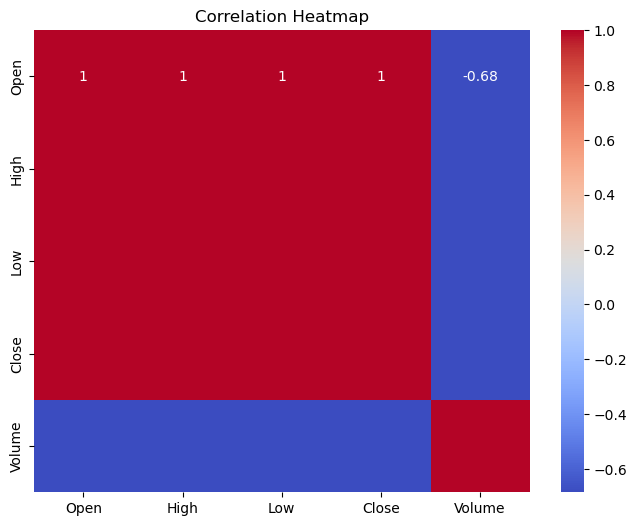

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

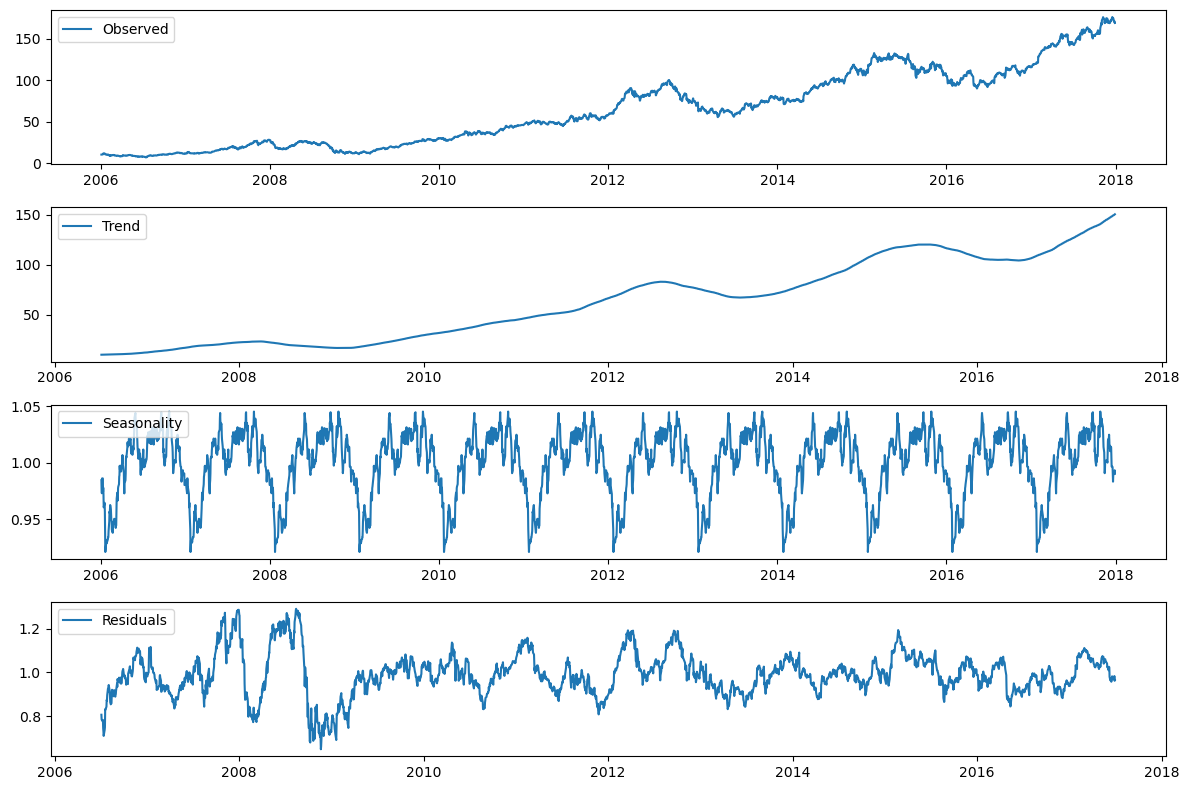

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
data = pd.read_csv(r"C:\Users\olivi\Downloads\AAPL_2006-01-01_to_2018-01-01 (1).csv", parse_dates=['Date'], index_col='Date')

# Time-Series Decomposition
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=252)  # 252 trading days in a year

# Plotting the Decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


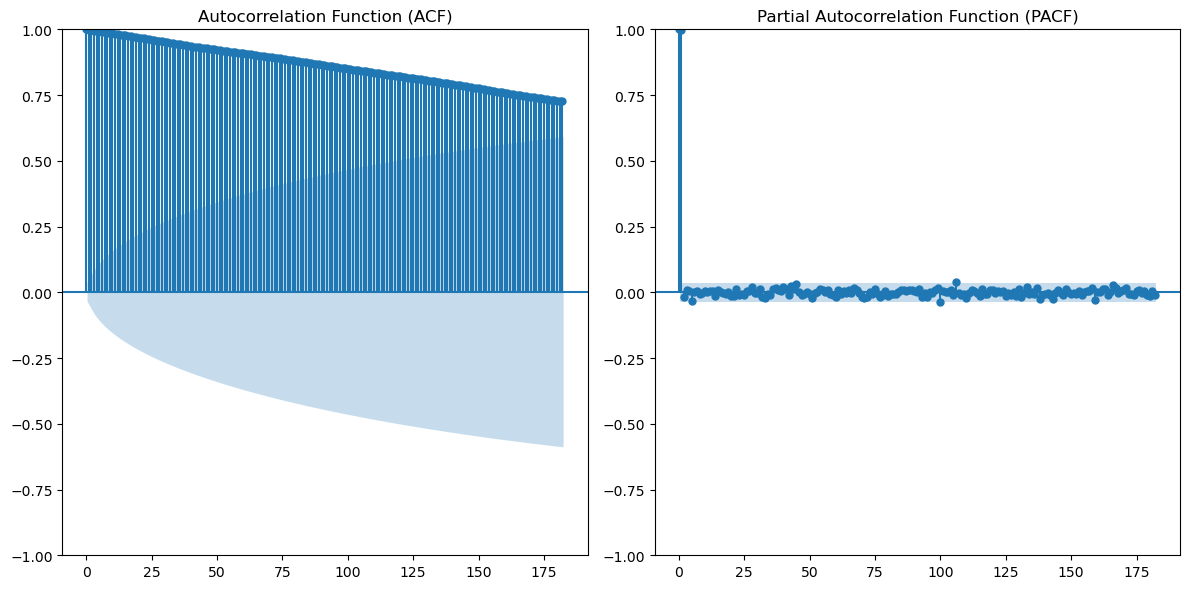

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
plt.figure(figsize=(12, 6))

# Autocorrelation Function (ACF)
plt.subplot(121)
plot_acf(data['Close'], lags=182, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Partial Autocorrelation Function (PACF)
plt.subplot(122)
plot_pacf(data['Close'], lags=182, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()
